In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def function(x, coeff):
    return coeff[0]*x**2 + coeff[1]*x + coeff[2]

In [10]:
X=np.array([0,1,2,3,1,1.5])
Y =np.array([1,2,1.5,2,1,2])
degrees = 2
iterations = 1000
learningRate = 0.00001
n = len(X)

coeff = np.array([0.,0.,0.])

y = np.array([function(X[i],coeff) for i in range(len(X))])
slope = 0
intercept = 0

In [11]:
def train(x,y,coeff,learningRate, iterations):
    n = len(x)
    for _ in range(iterations):
        y_pred = np.dot(x**2, coeff[2]) + np.dot(x, coeff[1]) + coeff[2]
        error = y-y_pred
        alpha2_gradient = (-1/2*n)* np.dot((x**2).T, error)
        alpha1_gradient = (-1/2*n)* np.dot(x.T, error)
        alpha0_gradient =  (-1/n)*np.sum(error)
        # print(alpha2_gradient.shape)
        # print(alpha1_gradient.shape)
        # print(alpha0_gradient.shape)

        coeff_gradient = np.array([alpha2_gradient, alpha1_gradient, alpha0_gradient])
        
        coeff -= coeff_gradient*learningRate

    return coeff

In [12]:
def predict(x, coeff):
    return np.dot(x**2, coeff[2]) + np.dot(x, coeff[1]) + coeff[2]

[0.69276487 0.34284496 0.01290952]


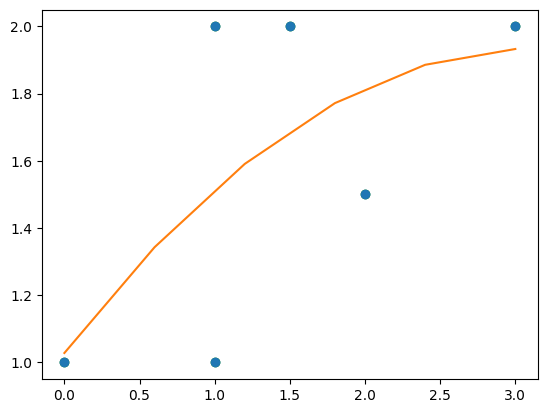

SSE:  7.390411939981295


In [13]:
coeff = train(X, Y,coeff, learningRate, iterations)
print(coeff)
plt.scatter(X, Y,color='g') 
p = np.poly1d( np.polyfit(X, Y, 2) )
t = np.linspace(0, 3, 6)
plt.plot(X, Y, 'o', t, p(t), '-')
plt.show()
print("SSE: ",sum_squared_error(X,Y))

In [6]:
def sum_squared_error(X,Y):
    predicted = predict(X,coeff)
    return sum([(Y[i]-predicted[i])**2 for i in range(len(X))])